### NEURAL NETWORKS Lab 6 - Multi-layer Perceptron for regression

In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

## Excercise 1

 - Use the following genertor function to generate 1D data for regression task. 
 - You can change the function if you wish.
 - Plot the data.

In [2]:
def func(x):
    return np.sin(x)+np.exp(np.cos(4*x))

def generator(N, minx=0, maxx=4):
    noise = np.random.normal(0, 0.1, N)
    x = (maxx-minx)*np.random.random(N)+minx
    y = func(x)+noise
    return x, y

#YOUR CODE HERE

In [3]:
x, y = generator(100)

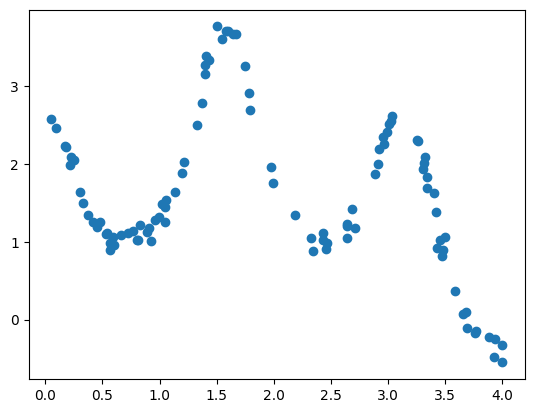

In [4]:
plt.scatter(x, y)

## Excercise 2

 - Create the MLPRegressor object, with a reasonable architecture and sensible parameter values (https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html). 
 - Train it on your generated data. 
 - Test it on the "xgrid" data proided below and calculate the score. 
 - Plot the data and the fitted curve
 - Plot the learning curve of the loss function (loss_curve_ attribute)

In [5]:
from sklearn.neural_network import MLPRegressor

xgrid = np.linspace(0, 4, 1000)
ygrid = func(xgrid)

mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='tanh', solver='lbfgs', shuffle=True, random_state=42, max_iter=2000)

mlp.fit(x.reshape(-1, 1), y)

MLPRegressor(activation='tanh', max_iter=2000, random_state=42, solver='lbfgs')

In [6]:
y_pred = mlp.predict(xgrid.reshape(-1, 1))
score = mlp.score(xgrid.reshape(-1, 1), ygrid)

print("MLP score: ", score)

MLP score:  0.9972078759348251


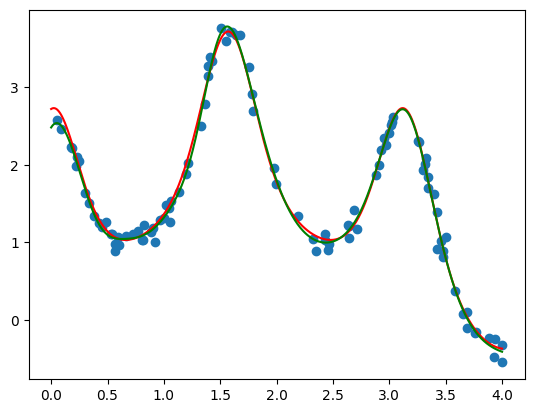

In [7]:
plt.scatter(x, y)
plt.plot(xgrid, ygrid, 'r')
plt.plot(xgrid, y_pred, 'g')

## Excercise 3

Using the GridSearchCV (or similar - see https://scikit-learn.org/stable/modules/grid_search.html), try to optimize your neural network with respect to a couple of its parameters. 

In [8]:
from sklearn.model_selection import GridSearchCV #(or alternative)

param_grid = {'hidden_layer_sizes': [(100,), (100, 100), (100, 100, 100)], 'activation': ['tanh', 'relu'], 'solver': ['lbfgs', 'adam'], 'max_iter': [500, 1000, 2000]}
grid = GridSearchCV(MLPRegressor(shuffle=True, random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid.fit(x.reshape(-1, 1), y)
y_pred = grid.predict(xgrid.reshape(-1, 1))

MLP score:  0.9972078759348251


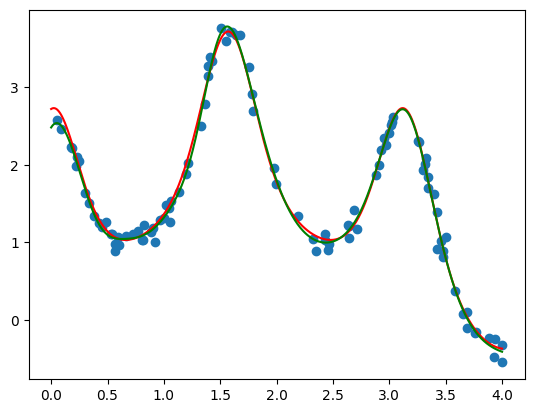

In [10]:
score = mlp.score(xgrid.reshape(-1, 1), ygrid)
print("MLP score: ", score)

plt.scatter(x, y)
plt.plot(xgrid, ygrid, 'r')
plt.plot(xgrid, y_pred, 'g')

## Excercise 4

 - Download the "california_housing" dataset (fetch_california_housing - see https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing)
 - Split the data on training and testing subsets using the "train_test_split" method
 - If needed, normalize the data

In [12]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import dataset
X, y = fetch_california_housing(return_X_y=True)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Normalize data
scaler = StandardScaler()
normalized_X_train = scaler.fit_transform(X_train)
normalized_X_test = scaler.transform(X_test)

In [14]:
X.shape

(20640, 8)

In [15]:
y.shape

(20640,)

## Excercise 5

- Create the MLPRegressor object and train it on training data
- Verify the score on testing data
- Try to optimize your network

In [16]:
mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='tanh', solver='adam', shuffle=True, random_state=42, max_iter=2000)

mlp.fit(normalized_X_train, y_train)
y_pred = mlp.predict(normalized_X_test)
score = mlp.score(normalized_X_test, y_test)
print("MLP score: ", score)

MLP score:  0.7753088445497648


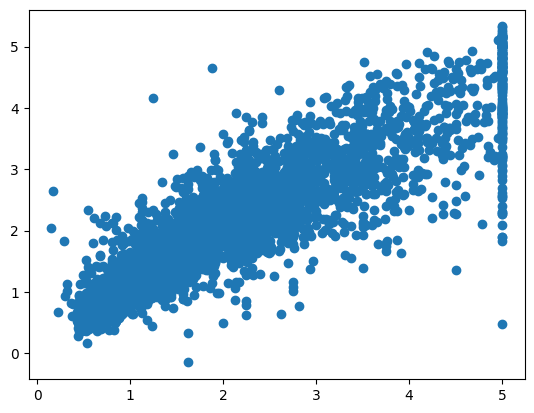

In [19]:
plt.plot(y_test, y_pred, 'o')

## Excercise 6

Evaluate your model on your whole dataset using the crossvalidation method (see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [20]:
from sklearn.model_selection import cross_val_score

cross_val_score(mlp, normalized_X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

array([-0.31818539, -0.30517848, -0.31777352, -0.29990735, -0.32750874])